<a href="https://colab.research.google.com/github/CharlemagneBrain/ECG_Image_Preprocessing/blob/main/ECG_Final_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls "/content/drive/MyDrive/"

 aziz.jpg            dantec.jpg   ecg_tracings.hdf5
'Colab Notebooks'/   dantec.pdf   Junior_Data_Scientist.pdf


In [ ]:
!apt-get install poppler-utils 
!pip install neurokit2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.13
Err:1 http://security.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.13
  404  Not Found [IP: 185.125.190.36 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/p/poppler/poppler-utils_0.62.0-2ubuntu2.13_amd64.deb  404  Not Found [IP: 185.125.190.36 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
Looking in indexes: https://pypi.org/simple, https:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import neurokit2 as nk
from PIL import Image 
from skimage.io import imread
from skimage import color
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray
from skimage import measure
import scipy.ndimage as ndimage  

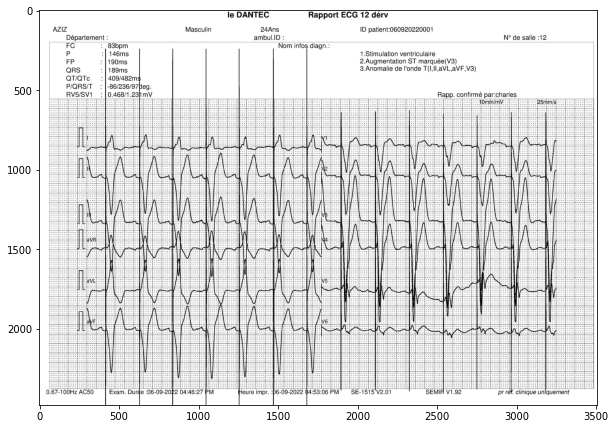

In [ ]:
plt.figure(figsize=(10, 8))
path = "/content/drive/MyDrive/aziz.jpg"
ecg = cv.imread(path)
plt.imshow(ecg)
plt.show;

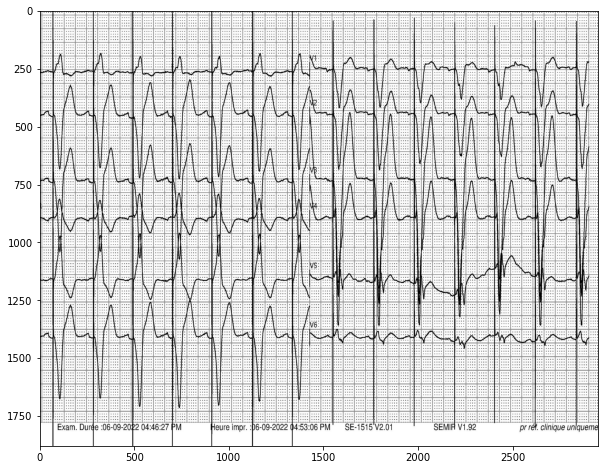

In [ ]:
plt.figure(figsize=(10, 8))
crop_ecg_img = ecg[600:2500, 350:3300]
plt.imshow(crop_ecg_img,cmap="gray", aspect="auto");

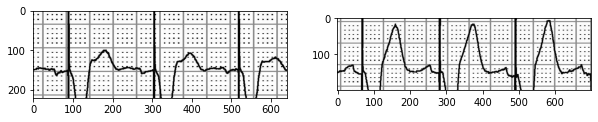

In [ ]:
fig, (ax1,ax2) = plt.subplots(
                                                nrows = 1,
                                                ncols=2,
                                                figsize=(10,10)
                                                );

v1 = crop_ecg_img[100:320,1460:2100]
d2 = crop_ecg_img[300:500,0:700]
ax1.imshow(v1, cmap='gray');
ax2.imshow(d2, cmap='gray');

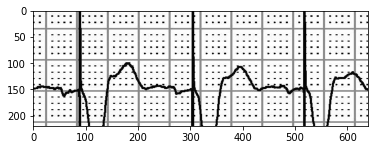

In [ ]:
derivations = [v1, d2]
plt.imshow(derivations[0], cmap="gray");

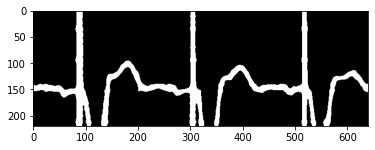

In [ ]:
#convertir en nuance de gris
grayscale_v1 = color.rgb2gray(v1)
grayscale_d2 = color.rgb2gray(d2)

# Lissage de l'image : consiste simplement à ** rendre l'image floue **. 
# On peut également dire que le flou de l'image adoucit le changement de valeur de pixel
# Le lissage peut éliminer ou rendre les bords moins visibles.
blurred_image_v1 = gaussian(grayscale_v1, sigma=3.5)
blurred_image_d2 = gaussian(grayscale_d2, sigma=3.5)

#seuil pour distinguer l'avant-plan et l'arrière-plan
#utiliser le seuillage otsu pour obtenir la valeur de seuil
global_thresh_v1 = threshold_otsu(blurred_image_v1)
global_thresh_d2 = threshold_otsu(blurred_image_d2)

#création d'une image binaire grâce à une valeur du seuil
binary_global_v1 = blurred_image_v1 < global_thresh_v1
binary_global_d2 = blurred_image_d2 < global_thresh_d2

#fig, (a1,ax2) = plt.subplots(1,2, figsize=(10,4))  

plt.imshow(binary_global_v1,cmap="gray")



plt.show();

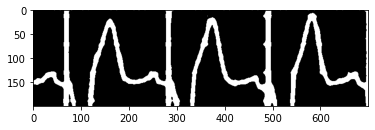

In [ ]:
plt.imshow(binary_global_d2,cmap="gray");

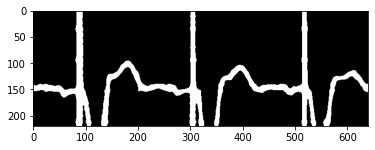

In [ ]:
plt.imshow(binary_global_v1,cmap="gray");

In [ ]:
binary_global_v1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

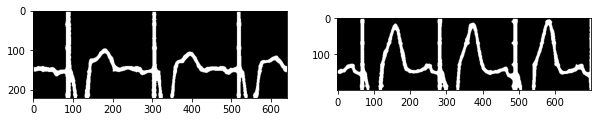

In [ ]:
def boolstr_to_floatstr(v):
    if v == 'True':
        return '1'
    elif v == 'False':
        return '0'
    else:
        return v  

new_data_v1 = np.vectorize(boolstr_to_floatstr)(binary_global_v1).astype(int)
new_data_d2 = np.vectorize(boolstr_to_floatstr)(binary_global_d2).astype(int)

fig, (ax1, ax2) = plt.subplots(
                                                nrows = 1,
                                                ncols=2,
                                                figsize=(10,10)
                                                );
ax1.imshow(new_data_v1, cmap="gray");
ax2.imshow(new_data_d2, cmap="gray");

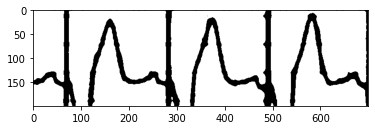

In [ ]:
neg_d2  = 255 - new_data_d2
plt.imshow(neg_d2, cmap="gray");

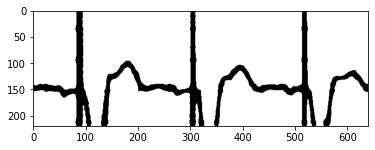

In [ ]:
neg_v1  = 255 - new_data_v1
plt.imshow(neg_v1, cmap="gray");

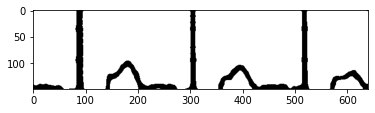

In [ ]:
v1_sup = neg_v1[0:150, :]
plt.imshow(v1_sup, cmap="gray");

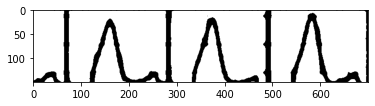

In [ ]:
d2_sup = neg_d2[0:150, :]
plt.imshow(d2_sup, cmap="gray");

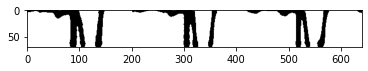

In [ ]:
v1_inf = neg_v1[150:, :]
plt.imshow(v1_inf, cmap="gray");

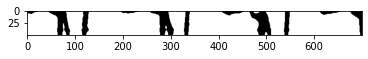

In [ ]:
d2_inf = neg_d2[150:, :]
plt.imshow(d2_inf, cmap="gray");

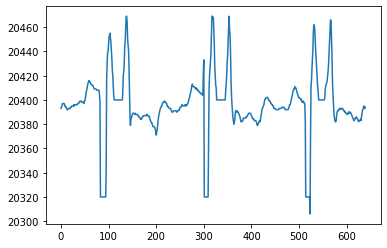

In [ ]:
v1_inf_sum_col = [ sum(x) for x in zip(*v1_inf) ]
v1_sup_sum_col = [ sum(x) for x in zip(*v1_sup) ]

negative_v1 = [element * -1 for element in v1_inf_sum_col]
re_array_v1 = np.vstack((v1_sup_sum_col, negative_v1))

final_result_v1 = [ sum(x) for x in zip(*re_array_v1) ]
#plt.figure(figsize=(30,6))
plt.plot(final_result_v1);

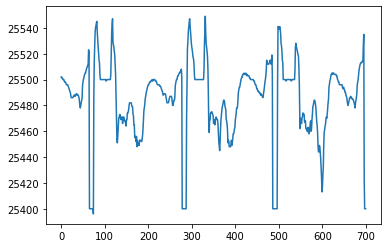

In [ ]:
d2_inf_sum_col = [ sum(x) for x in zip(*d2_inf) ]
d2_sup_sum_col = [ sum(x) for x in zip(*d2_sup) ]

negative_d2 = [element * -1 for element in d2_inf_sum_col]
re_array_d2 = np.vstack((d2_sup_sum_col, negative_d2))

final_result_d2 = [ sum(x) for x in zip(*re_array_d2) ]

plt.plot(final_result_d2);

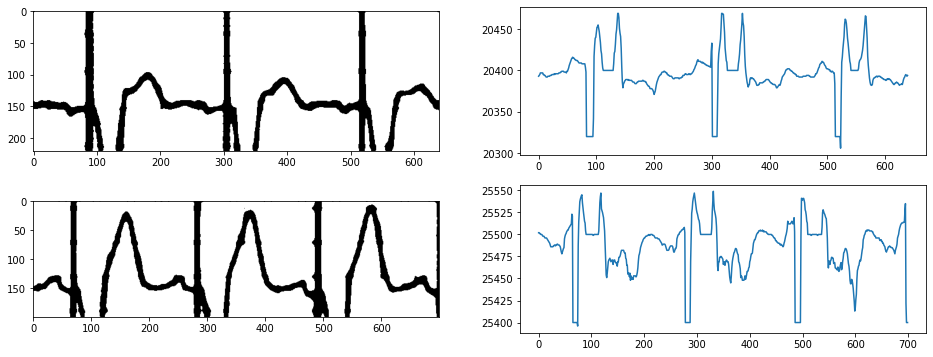

In [ ]:
fig, ax = plt.subplots(
                                                nrows = 2,
                                                ncols=2,
                                                figsize=(16,6)
                                                );

ax[0,0].imshow(neg_v1, cmap="gray");
ax[0,1].plot(final_result_v1);
ax[1,0].imshow(neg_d2, cmap="gray");
ax[1,1].plot(final_result_d2);
